# Rangkuman Chapter 3: Classification

## Berdasarkan buku "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"

Notebook ini berisi rangkuman lengkap Chapter 3 dengan implementasi Python untuk classification menggunakan MNIST dataset.

## 1. Pengenalan Classification

Supervised learning task dibagi menjadi dua kategori utama:
- **Regression**: Memprediksi nilai (values)
- **Classification**: Memprediksi kelas (classes)

Chapter ini fokus pada **classification systems** menggunakan MNIST dataset, yang sering disebut "hello world" dari Machine Learning.

### MNIST Dataset
- 70,000 gambar digits tulisan tangan (28×28 pixels)
- Setiap gambar memiliki label digit yang direpresentasikan
- 60,000 training images + 10,000 test images
- 784 features (28×28 pixels, intensity 0-255)

## 2. Load dan Explore MNIST Dataset

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml

print("Libraries berhasil diimport!")

Libraries berhasil diimport!


In [2]:
# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

print("MNIST dataset keys:", mnist.keys())

MNIST dataset keys: dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [3]:
# Load data
X, y = mnist["data"], mnist["target"]

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nTotal images: {len(X)}")
print(f"Features per image: {X.shape[1]} (28×28 pixels)")

X shape: (70000, 784)
y shape: (70000,)

Total images: 70000
Features per image: 784 (28×28 pixels)


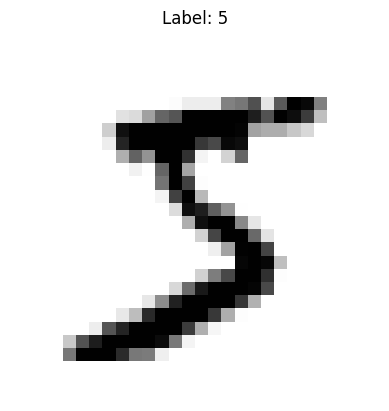

Label untuk gambar ini: 5


In [4]:
# Lihat satu digit
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.title(f"Label: {y[0]}")
plt.show()

print(f"Label untuk gambar ini: {y[0]}")

In [5]:
# Convert labels ke integer
y = y.astype(np.uint8)
print(f"Label type: {y.dtype}")

Label type: uint8


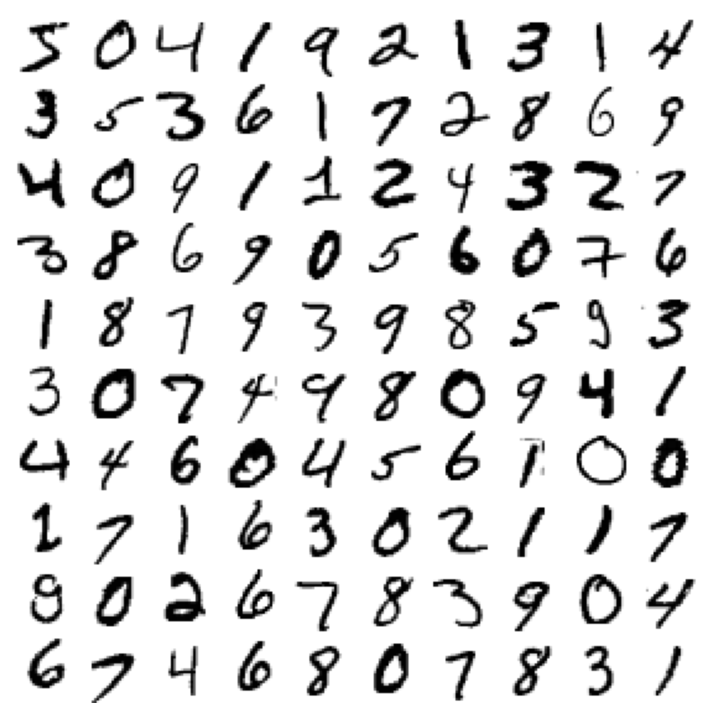

Berbagai contoh digits dari MNIST dataset


In [6]:
# Visualisasi beberapa digits
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // images_per_row + 1
    
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images = list(instances) + [np.zeros((size, size))] * n_empty
    
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

# Plot 100 digits pertama
plt.figure(figsize=(9, 9))
example_images = X[:100].reshape(-1, 28, 28)
plot_digits(example_images, images_per_row=10)
plt.show()

print("Berbagai contoh digits dari MNIST dataset")

### 2.1 Create Train/Test Sets

In [7]:
# MNIST sudah di-split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print(f"Training set: {len(X_train)} images")
print(f"Test set: {len(X_test)} images")
print("\nTraining set sudah di-shuffle untuk cross-validation")

Training set: 60000 images
Test set: 10000 images

Training set sudah di-shuffle untuk cross-validation


## 3. Training Binary Classifier

Mulai dengan problem sederhana: **5-detector** (binary classifier untuk mendeteksi angka 5).

In [8]:
# Buat target vectors untuk binary classification
y_train_5 = (y_train == 5)  # True untuk semua 5s, False untuk lainnya
y_test_5 = (y_test == 5)

print(f"y_train_5 shape: {y_train_5.shape}")
print(f"Contoh: y_train_5[:10] = {y_train_5[:10]}")
print(f"Jumlah 5s di training set: {sum(y_train_5)}")

y_train_5 shape: (60000,)
Contoh: y_train_5[:10] = [ True False False False False False False False False False]
Jumlah 5s di training set: 5421


In [9]:
# Train Stochastic Gradient Descent (SGD) Classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

print("SGD Classifier berhasil dilatih!")

SGD Classifier berhasil dilatih!


In [10]:
# Test prediction
prediction = sgd_clf.predict([some_digit])

print(f"Prediction untuk digit pertama: {prediction[0]}")
print(f"Actual label: {y[0]}")
print(f"Classifier benar!" if prediction[0] == (y[0] == 5) else "Classifier salah!")

Prediction untuk digit pertama: True
Actual label: 5
Classifier benar!


## 4. Performance Measures

### 4.1 Measuring Accuracy Using Cross-Validation

In [11]:
# Cross-validation manual implementation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

print("=== Manual Cross-Validation ===")
for fold_idx, (train_index, test_index) in enumerate(skfolds.split(X_train, y_train_5), 1):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    accuracy = n_correct / len(y_pred)
    print(f"Fold {fold_idx}: {accuracy:.4f}")

=== Manual Cross-Validation ===
Fold 1: 0.9669
Fold 2: 0.9163
Fold 3: 0.9678


In [12]:
# Menggunakan cross_val_score
from sklearn.model_selection import cross_val_score

accuracy_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

print("\n=== Cross-Validation dengan cross_val_score ===")
print(f"Scores: {accuracy_scores}")
print(f"Mean accuracy: {accuracy_scores.mean():.4f}")
print("\nWow! >93% accuracy pada semua folds!")


=== Cross-Validation dengan cross_val_score ===
Scores: [0.95035 0.96035 0.9604 ]
Mean accuracy: 0.9570

Wow! >93% accuracy pada semua folds!


In [13]:
# Dummy classifier untuk perbandingan
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
dummy_scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

print("=== Dummy Classifier (selalu prediksi 'not-5') ===")
print(f"Scores: {dummy_scores}")
print(f"Mean accuracy: {dummy_scores.mean():.4f}")
print("\nHanya ~10% images adalah 5s, jadi prediksi 'not-5' dapat ~90% accuracy!")
print("Ini menunjukkan accuracy BUKAN metric yang baik untuk skewed datasets.")

=== Dummy Classifier (selalu prediksi 'not-5') ===
Scores: [0.91125 0.90855 0.90915]
Mean accuracy: 0.9096

Hanya ~10% images adalah 5s, jadi prediksi 'not-5' dapat ~90% accuracy!
Ini menunjukkan accuracy BUKAN metric yang baik untuk skewed datasets.


### 4.2 Confusion Matrix

In [14]:
# Generate predictions dengan cross_val_predict
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

print("Predictions generated untuk confusion matrix")

Predictions generated untuk confusion matrix


In [15]:
# Hitung confusion matrix
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train_5, y_train_pred)

print("=== Confusion Matrix ===")
print(conf_mx)
print("\nPenjelasan:")
print(f"True Negatives (TN): {conf_mx[0, 0]:,} - Correctly classified as not-5")
print(f"False Positives (FP): {conf_mx[0, 1]:,} - Wrongly classified as 5")
print(f"False Negatives (FN): {conf_mx[1, 0]:,} - Wrongly classified as not-5")
print(f"True Positives (TP): {conf_mx[1, 1]:,} - Correctly classified as 5")

=== Confusion Matrix ===
[[53892   687]
 [ 1891  3530]]

Penjelasan:
True Negatives (TN): 53,892 - Correctly classified as not-5
False Positives (FP): 687 - Wrongly classified as 5
False Negatives (FN): 1,891 - Wrongly classified as not-5
True Positives (TP): 3,530 - Correctly classified as 5


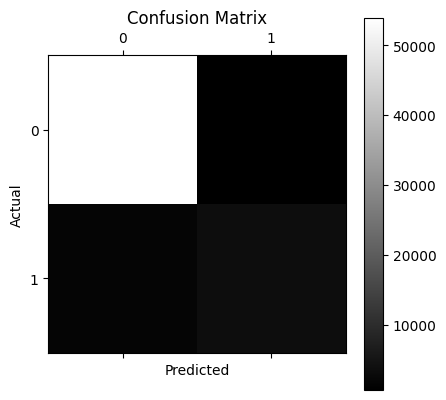

In [16]:
# Visualisasi confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 4.3 Precision and Recall

In [17]:
# Hitung precision dan recall
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

print("=== Precision and Recall ===")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nPrecision = TP / (TP + FP)")
print(f"Precision = {conf_mx[1,1]} / ({conf_mx[1,1]} + {conf_mx[0,1]}) = {precision:.4f}")
print("\nRecall = TP / (TP + FN)")
print(f"Recall = {conf_mx[1,1]} / ({conf_mx[1,1]} + {conf_mx[1,0]}) = {recall:.4f}")

=== Precision and Recall ===
Precision: 0.8371
Recall: 0.6512

Precision = TP / (TP + FP)
Precision = 3530 / (3530 + 687) = 0.8371

Recall = TP / (TP + FN)
Recall = 3530 / (3530 + 1891) = 0.6512


In [18]:
# F1 Score
from sklearn.metrics import f1_score

f1 = f1_score(y_train_5, y_train_pred)

print("=== F1 Score ===")
print(f"F1 Score: {f1:.4f}")
print("\nF1 = 2 × (precision × recall) / (precision + recall)")
print(f"F1 = 2 × ({precision:.4f} × {recall:.4f}) / ({precision:.4f} + {recall:.4f}) = {f1:.4f}")
print("\nF1 score adalah harmonic mean dari precision dan recall")

=== F1 Score ===
F1 Score: 0.7325

F1 = 2 × (precision × recall) / (precision + recall)
F1 = 2 × (0.8371 × 0.6512) / (0.8371 + 0.6512) = 0.7325

F1 score adalah harmonic mean dari precision dan recall


### 4.4 Precision/Recall Trade-off

In [19]:
# Get decision scores
y_scores = sgd_clf.decision_function([some_digit])

print("=== Decision Function ===")
print(f"Score untuk digit pertama: {y_scores[0]:.2f}")
print(f"\nDefault threshold: 0")
print(f"Prediction (threshold=0): {y_scores[0] > 0}")
print(f"\nRaise threshold to 8000:")
print(f"Prediction (threshold=8000): {y_scores[0] > 8000}")

=== Decision Function ===
Score untuk digit pertama: 2164.22

Default threshold: 0
Prediction (threshold=0): True

Raise threshold to 8000:
Prediction (threshold=8000): False


In [20]:
# Get scores untuk semua training instances
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

print(f"Scores shape: {y_scores.shape}")

Scores shape: (60000,)


In [21]:
# Hitung precision dan recall untuk berbagai thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

print(f"Precisions array length: {len(precisions)}")
print(f"Recalls array length: {len(recalls)}")
print(f"Thresholds array length: {len(thresholds)}")

Precisions array length: 60001
Recalls array length: 60001
Thresholds array length: 60000


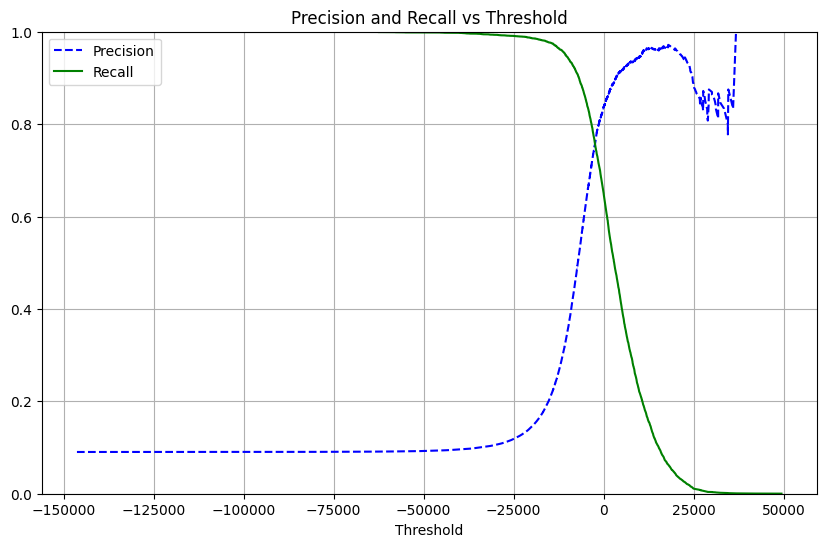

Increasing threshold → precision ↑, recall ↓


In [22]:
# Plot precision dan recall vs threshold
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="best")
    plt.ylim([0, 1])
    plt.grid(True)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.title('Precision and Recall vs Threshold')
plt.show()

print("Increasing threshold → precision ↑, recall ↓")

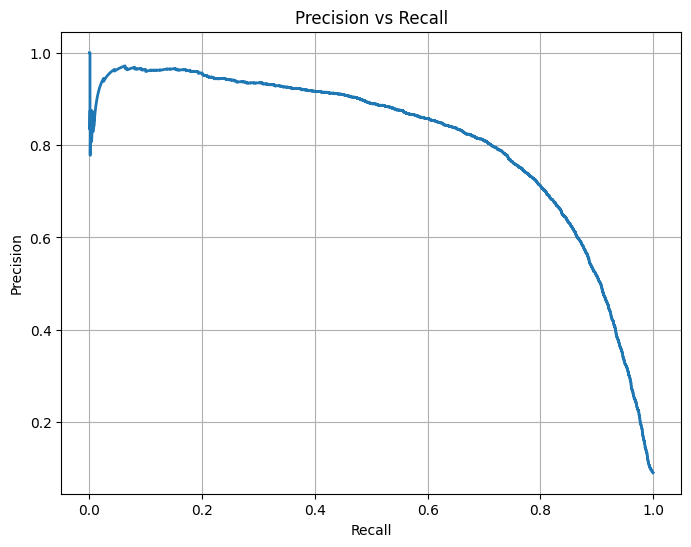

Precision mulai turun drastis sekitar 80% recall


In [23]:
# Plot precision vs recall
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precision vs Recall')
plt.grid(True)
plt.show()

print("Precision mulai turun drastis sekitar 80% recall")

In [24]:
# Mencari threshold untuk 90% precision
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

print(f"=== 90% Precision Target ===")
print(f"Threshold untuk 90% precision: {threshold_90_precision:.2f}")

# Buat predictions dengan threshold ini
y_train_pred_90 = (y_scores >= threshold_90_precision)

precision_90 = precision_score(y_train_5, y_train_pred_90)
recall_90 = recall_score(y_train_5, y_train_pred_90)

print(f"\nPrecision: {precision_90:.4f}")
print(f"Recall: {recall_90:.4f}")
print("\nTrade-off: High precision (90%) → Low recall (~44%)")

=== 90% Precision Target ===
Threshold untuk 90% precision: 3370.02

Precision: 0.9000
Recall: 0.4800

Trade-off: High precision (90%) → Low recall (~44%)


### 4.5 ROC Curve

In [25]:
# Hitung TPR dan FPR
from sklearn.metrics import roc_curve

fpr, tpr, thresholds_roc = roc_curve(y_train_5, y_scores)

print("ROC curve data calculated")
print("TPR (True Positive Rate) = Recall = Sensitivity")
print("FPR (False Positive Rate) = 1 - Specificity")

ROC curve data calculated
TPR (True Positive Rate) = Recall = Sensitivity
FPR (False Positive Rate) = 1 - Specificity


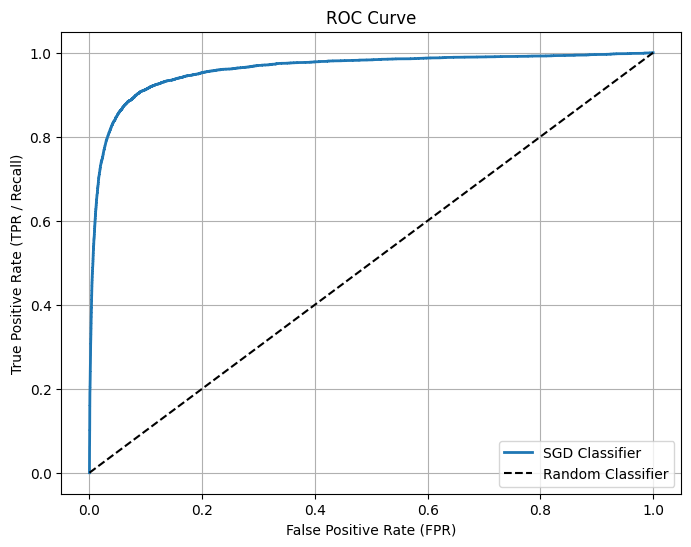

Classifier yang baik: kurva mendekati top-left corner
Random classifier: diagonal line (ROC AUC = 0.5)


In [26]:
# Plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR / Recall)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)

plot_roc_curve(fpr, tpr, "SGD Classifier")
plt.show()

print("Classifier yang baik: kurva mendekati top-left corner")
print("Random classifier: diagonal line (ROC AUC = 0.5)")

In [27]:
# Hitung ROC AUC score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_train_5, y_scores)

print(f"=== ROC AUC Score ===")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nPerfect classifier: ROC AUC = 1.0")
print("Random classifier: ROC AUC = 0.5")

=== ROC AUC Score ===
ROC AUC: 0.9605

Perfect classifier: ROC AUC = 1.0
Random classifier: ROC AUC = 0.5


### 4.6 Comparing with Random Forest Classifier

In [28]:
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

print("Random Forest trained dengan cross_val_predict")
print(f"Probabilities shape: {y_probas_forest.shape}")
print("Column 0: probability of negative class")
print("Column 1: probability of positive class")

Random Forest trained dengan cross_val_predict
Probabilities shape: (60000, 2)
Column 0: probability of negative class
Column 1: probability of positive class


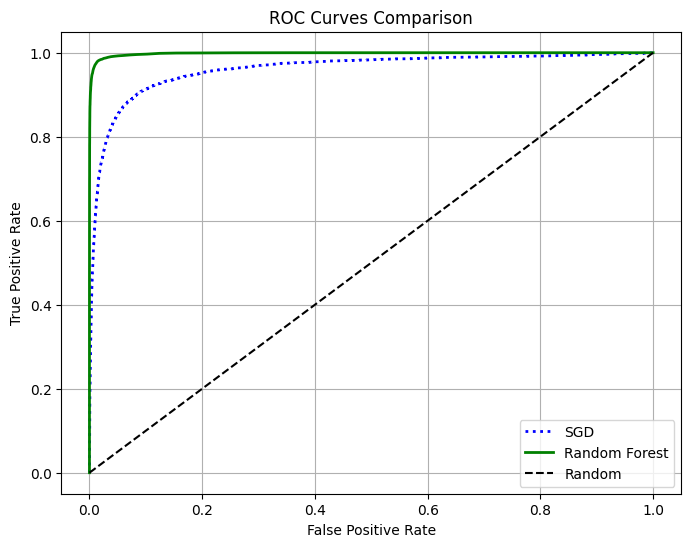

In [29]:
# Gunakan positive class probability sebagai score
y_scores_forest = y_probas_forest[:, 1]

# Hitung ROC curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

# Plot comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plt.plot(fpr_forest, tpr_forest, "g-", linewidth=2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [30]:
# Compare ROC AUC scores
roc_auc_forest = roc_auc_score(y_train_5, y_scores_forest)

print("=== ROC AUC Comparison ===")
print(f"SGD Classifier: {roc_auc:.4f}")
print(f"Random Forest: {roc_auc_forest:.4f}")
print(f"\nRandom Forest lebih baik dengan AUC: {roc_auc_forest:.4f}")

=== ROC AUC Comparison ===
SGD Classifier: 0.9605
Random Forest: 0.9983

Random Forest lebih baik dengan AUC: 0.9983


In [31]:
# Hitung precision dan recall untuk Random Forest
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

precision_forest = precision_score(y_train_5, y_train_pred_forest)
recall_forest = recall_score(y_train_5, y_train_pred_forest)

print("=== Random Forest Precision & Recall ===")
print(f"Precision: {precision_forest:.4f}")
print(f"Recall: {recall_forest:.4f}")
print("\nSangat bagus! ~99% precision dan ~87% recall")

=== Random Forest Precision & Recall ===
Precision: 0.9905
Recall: 0.8663

Sangat bagus! ~99% precision dan ~87% recall


## 5. Multiclass Classification

Binary classifiers membedakan 2 kelas, sedangkan **multiclass classifiers** dapat membedakan lebih dari 2 kelas.

### Strategi:
1. **One-vs-Rest (OvR)**: Train N binary classifiers (1 per class)
2. **One-vs-One (OvO)**: Train N×(N-1)/2 binary classifiers (1 per pair)

Beberapa algorithms (SGD, Random Forest) sudah support multiclass secara native.

In [32]:
# Train SGD Classifier untuk semua 10 digits
sgd_clf.fit(X_train, y_train)

print("SGD Classifier trained untuk 10 classes (0-9)")

SGD Classifier trained untuk 10 classes (0-9)


In [33]:
# Prediksi
prediction = sgd_clf.predict([some_digit])

print(f"Prediction: {prediction[0]}")
print(f"Actual: {y[0]}")
print(f"Benar!" if prediction[0] == y[0] else "Salah!")

Prediction: 3
Actual: 5
Salah!


In [34]:
# Decision function scores
some_digit_scores = sgd_clf.decision_function([some_digit])

print("=== Decision Scores ===")
print(f"Scores shape: {some_digit_scores.shape}")
print(f"Scores: {some_digit_scores[0]}")
print(f"\nHighest score index: {np.argmax(some_digit_scores)}")
print(f"Classes: {sgd_clf.classes_}")
print(f"Predicted class: {sgd_clf.classes_[np.argmax(some_digit_scores)]}")

=== Decision Scores ===
Scores shape: (1, 10)
Scores: [-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
 -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
  -4604.35491274 -12050.767298  ]

Highest score index: 3
Classes: [0 1 2 3 4 5 6 7 8 9]
Predicted class: 3


In [35]:
# Train dengan SVM (otomatis menggunakan OvO)
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])  # Sample kecil untuk speed

print("SVM Classifier trained (sample 2000 images)")
print(f"\nPrediction: {svm_clf.predict([some_digit])[0]}")

SVM Classifier trained (sample 2000 images)

Prediction: 5


In [36]:
# Explicitly use OvR strategy
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

print(f"OvR Classifier trained dengan {len(ovr_clf.estimators_)} binary classifiers")
print(f"Prediction: {ovr_clf.predict([some_digit])[0]}")

OvR Classifier trained dengan 10 binary classifiers
Prediction: 5


In [37]:
# Cross-validation untuk multiclass
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Evaluate
multiclass_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

print("=== Multiclass Classification Performance ===")
print(f"Cross-validation scores: {multiclass_scores}")
print(f"Mean accuracy: {multiclass_scores.mean():.4f}")
print("\nDengan scaling, accuracy >89%!")

=== Multiclass Classification Performance ===
Cross-validation scores: [0.8983 0.891  0.9018]
Mean accuracy: 0.8970

Dengan scaling, accuracy >89%!


## 6. Error Analysis

In [38]:
# Generate predictions untuk confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

print("Predictions generated untuk error analysis")

Predictions generated untuk error analysis


In [39]:
# Confusion matrix untuk multiclass
conf_mx = confusion_matrix(y_train, y_train_pred)

print("=== Confusion Matrix (10x10) ===")
print(conf_mx)
print(f"\nShape: {conf_mx.shape}")

=== Confusion Matrix (10x10) ===
[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]

Shape: (10, 10)


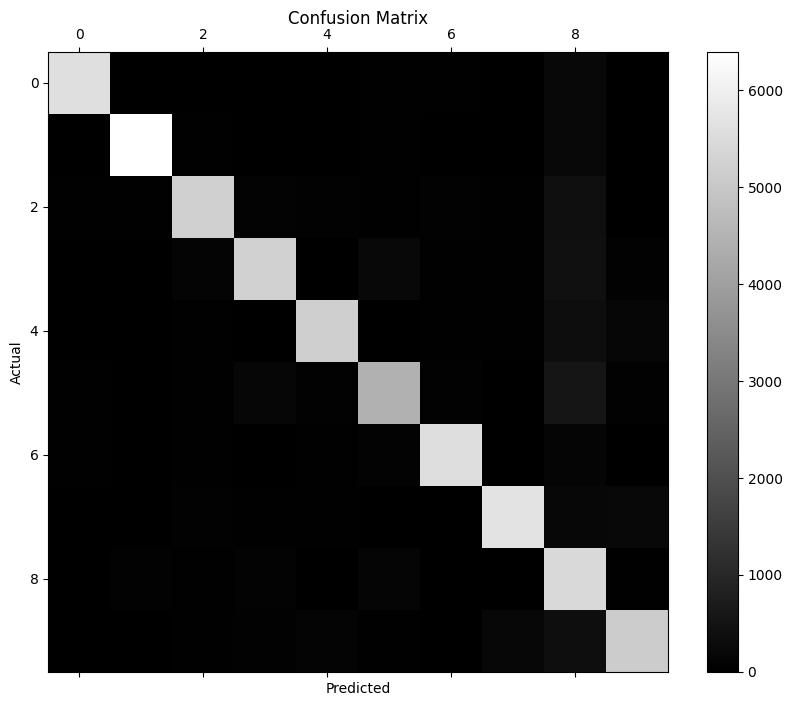

Diagonal yang cerah = classifications yang benar
Off-diagonal = errors


In [40]:
# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
plt.matshow(conf_mx, cmap=plt.cm.gray, fignum=1)
plt.title('Confusion Matrix', pad=20)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("Diagonal yang cerah = classifications yang benar")
print("Off-diagonal = errors")

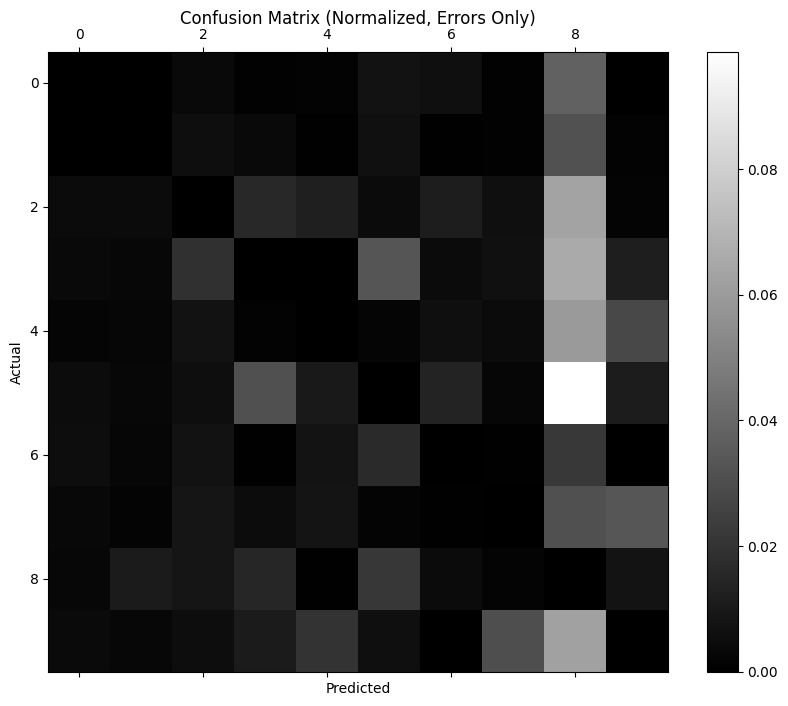


Observasi:
- Column 8 cukup bright: banyak images misclassified sebagai 8s
- 3s dan 5s sering confused (both directions)


In [41]:
# Normalize confusion matrix untuk fokus pada error rates
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# Fill diagonal dengan 0 untuk highlight errors
np.fill_diagonal(norm_conf_mx, 0)

plt.figure(figsize=(10, 8))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray, fignum=1)
plt.title('Confusion Matrix (Normalized, Errors Only)', pad=20)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nObservasi:")
print("- Column 8 cukup bright: banyak images misclassified sebagai 8s")
print("- 3s dan 5s sering confused (both directions)")

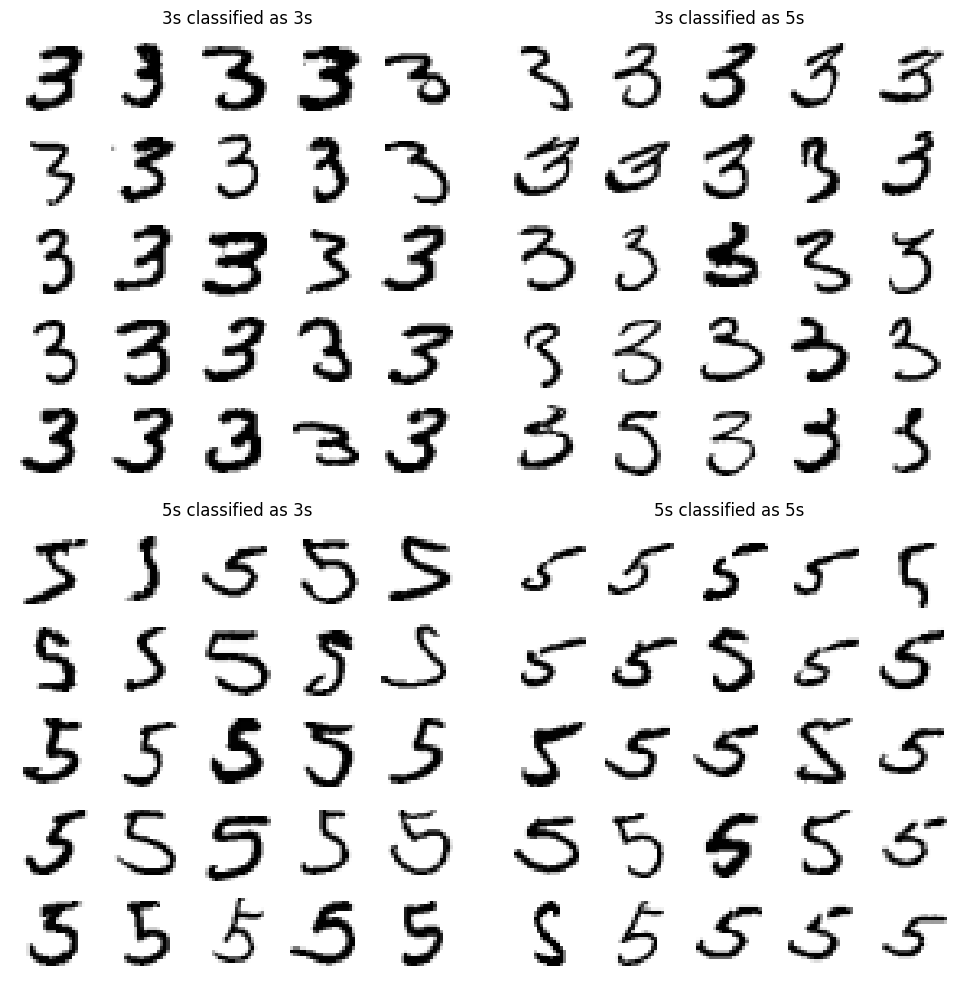

Beberapa misclassifications sulit bahkan untuk manusia!
SGDClassifier adalah linear model, jadi sensitif terhadap shift dan rotation.


In [42]:
# Analyze 3s vs 5s confusion
cl_a, cl_b = 3, 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(10, 10))

plt.subplot(221)
plot_digits(X_aa[:25].reshape(-1, 28, 28), images_per_row=5)
plt.title('3s classified as 3s')

plt.subplot(222)
plot_digits(X_ab[:25].reshape(-1, 28, 28), images_per_row=5)
plt.title('3s classified as 5s')

plt.subplot(223)
plot_digits(X_ba[:25].reshape(-1, 28, 28), images_per_row=5)
plt.title('5s classified as 3s')

plt.subplot(224)
plot_digits(X_bb[:25].reshape(-1, 28, 28), images_per_row=5)
plt.title('5s classified as 5s')

plt.tight_layout()
plt.show()

print("Beberapa misclassifications sulit bahkan untuk manusia!")
print("SGDClassifier adalah linear model, jadi sensitif terhadap shift dan rotation.")

## 7. Multilabel Classification

**Multilabel classification**: Output multiple binary tags per instance.

In [43]:
# Buat multilabel targets
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)  # Large digits: 7, 8, 9
y_train_odd = (y_train % 2 == 1)  # Odd digits: 1, 3, 5, 7, 9
y_multilabel = np.c_[y_train_large, y_train_odd]

print(f"Multilabel target shape: {y_multilabel.shape}")
print(f"Example: {y_multilabel[:5]}")
print("Column 0: is_large, Column 1: is_odd")

Multilabel target shape: (60000, 2)
Example: [[False  True]
 [False False]
 [False False]
 [False  True]
 [ True  True]]
Column 0: is_large, Column 1: is_odd


In [44]:
# Train k-NN classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

print("k-NN classifier trained untuk multilabel classification")

k-NN classifier trained untuk multilabel classification


In [45]:
# Prediksi
prediction = knn_clf.predict([some_digit])

print(f"Prediction: {prediction[0]}")
print(f"Digit {y[0]} is large? {prediction[0][0]}")
print(f"Digit {y[0]} is odd? {prediction[0][1]}")
print(f"\nBenar! {y[0]} tidak large (< 7) dan odd")

Prediction: [False  True]
Digit 5 is large? False
Digit 5 is odd? True

Benar! 5 tidak large (< 7) dan odd


In [46]:
# Evaluate multilabel classifier
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_multilabel = f1_score(y_multilabel, y_train_knn_pred, average="macro")

print(f"=== Multilabel Classification Performance ===")
print(f"F1 Score (macro average): {f1_multilabel:.4f}")
print("\nMacro average: rata-rata F1 score untuk setiap label")

=== Multilabel Classification Performance ===
F1 Score (macro average): 0.9764

Macro average: rata-rata F1 score untuk setiap label


## 8. Multioutput Classification

**Multioutput classification**: Generalisasi dari multilabel di mana setiap label bisa multiclass.

Contoh: **Noise removal** - input noisy image, output clean image.

In [47]:
# Tambahkan noise ke images
np.random.seed(42)

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# Target adalah original clean images
y_train_mod = X_train
y_test_mod = X_test

print("Noisy training data created")
print(f"X_train_mod shape: {X_train_mod.shape}")
print(f"y_train_mod shape: {y_train_mod.shape}")

Noisy training data created
X_train_mod shape: (60000, 784)
y_train_mod shape: (60000, 784)


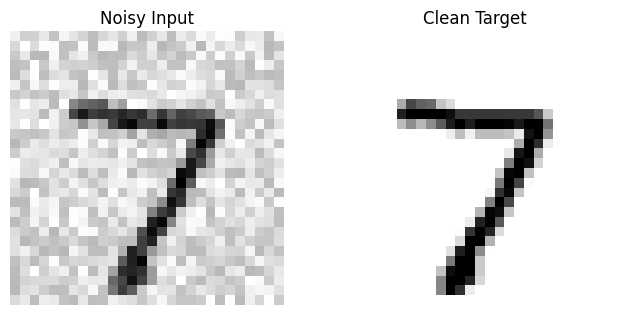

In [48]:
# Visualisasi noisy image
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

some_index = 0

plt.figure(figsize=(12, 4))
plt.subplot(131)
plot_digit(X_test_mod[some_index])
plt.title('Noisy Input')

plt.subplot(132)
plot_digit(y_test_mod[some_index])
plt.title('Clean Target')

plt.show()

In [49]:
# Train classifier untuk noise removal
knn_clf.fit(X_train_mod, y_train_mod)

print("k-NN classifier trained untuk multioutput classification (noise removal)")

k-NN classifier trained untuk multioutput classification (noise removal)


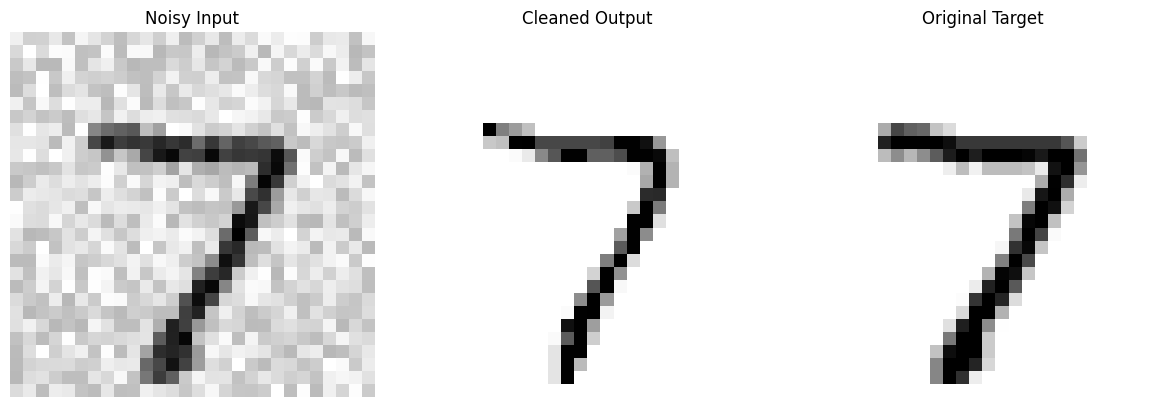

Cukup dekat dengan target! Noise removal berhasil.


In [50]:
# Clean the noisy image
clean_digit = knn_clf.predict([X_test_mod[some_index]])

plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_digit(X_test_mod[some_index])
plt.title('Noisy Input')

plt.subplot(132)
plot_digit(clean_digit)
plt.title('Cleaned Output')

plt.subplot(133)
plot_digit(y_test_mod[some_index])
plt.title('Original Target')

plt.tight_layout()
plt.show()

print("Cukup dekat dengan target! Noise removal berhasil.")

## 9. Summary & Best Practices

### Classification Workflow:

1. **Load dan Explore Data**:
   - Visualisasi sample data
   - Check class distribution
   - Create train/test splits

2. **Choose Appropriate Metrics**:
   - **Accuracy**: Baik untuk balanced datasets
   - **Precision**: Ketika false positives mahal
   - **Recall**: Ketika false negatives mahal
   - **F1 Score**: Balance antara precision dan recall
   - **ROC AUC**: Overall classifier performance

3. **Performance Evaluation**:
   - Cross-validation untuk reliable estimates
   - Confusion matrix untuk detailed analysis
   - Precision/recall trade-off adjustment

4. **Model Selection**:
   - Try multiple classifiers (SGD, Random Forest, SVM, etc.)
   - Compare ROC curves
   - Consider training time vs performance

5. **Error Analysis**:
   - Analyze confusion matrix
   - Visualize misclassified examples
   - Identify patterns in errors

6. **Improvement Strategies**:
   - Data preprocessing (scaling, centering)
   - Feature engineering
   - Data augmentation
   - Hyperparameter tuning

### Important Notes:

- **Skewed datasets**: Jangan andalkan accuracy
- **Precision/Recall trade-off**: Sesuaikan dengan business requirements
- **ROC vs PR curve**: Gunakan PR curve untuk imbalanced datasets
- **Multiclass strategies**: OvR vs OvO tergantung algorithm
- **Error analysis**: Kunci untuk improvement

### Classification Types:

1. **Binary Classification**: 2 classes
2. **Multiclass Classification**: >2 classes, 1 label per instance
3. **Multilabel Classification**: Multiple binary labels per instance
4. **Multioutput Classification**: Multiple multiclass labels per instance

## Kesimpulan

Chapter 3 memberikan foundation lengkap untuk classification:

✓ **MNIST dataset**: "Hello world" dari ML classification

✓ **Binary classification**: 5-detector dengan SGD dan Random Forest

✓ **Performance metrics**: Accuracy, Precision, Recall, F1, ROC AUC

✓ **Confusion matrix**: Detailed error analysis tool

✓ **Precision/Recall trade-off**: Adjust threshold berdasarkan needs

✓ **ROC curves**: Compare classifiers visually

✓ **Multiclass classification**: OvR dan OvO strategies

✓ **Error analysis**: Identify improvement opportunities

✓ **Multilabel & Multioutput**: Advanced classification tasks

Classification adalah fundamental ML task. Dengan pemahaman yang kuat tentang metrics, evaluation techniques, dan error analysis, sekarang dapat membangun dan optimize classifiers untuk berbagai real-world problems.

---